## Ruby Lifetime Analysis

In [1]:
#first import everything needed, you'll only need to run this once at the beginning 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sy
import scipy.optimize as optimize
import math

# -----------Analysis without MCS-------------------

In [2]:
#import the data file, call the first column x and second column y
x,y = np.genfromtxt('4mm_410nmLED_1mmAP_lifetime.txt', unpack=True, usecols=(0,1))
x = x[0:2047]*1000.0   # convert to millisec and get rid of extrq point.
y = y[0:2047]

In [3]:
#saves the x and y data from the previous line and saves it to its own text file, only needs to be run once or is the origional file is altered 
#np.savetxt('xdata.txt',x,newline='\n')
#np.savetxt('ydata.txt',y,newline='\n')

In [4]:
ix,=np.where((x>=38000)) #create a slice of just the data you want to use
data=np.array([x[ix],y[ix]]).T #make it into an array

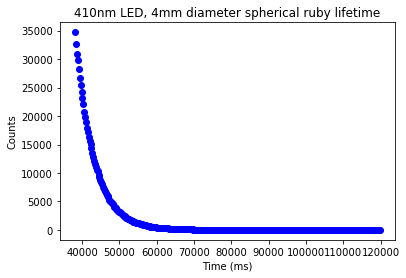

In [5]:
#plots the lifetime data
plt.plot(x[ix],y[ix],'bo')
plt.xlabel('Time (ms)')
plt.ylabel('Counts')
plt.title('410nm LED, 4mm diameter spherical ruby lifetime')
#plt.axis([-0.0005, 0.05,0,4800])
plt.show()

In [6]:
#set some parameters 
n1o = y[ix][0]*2/3
n2o = n1o/2
gam1 = 0.4                # inverse millisec
gam2 = 0.1                # inverse millisec
B = 0.0
ps = [n1o,gam1,n2o,gam2,B]
ps_s = [(n1o+n2o),gam1,B] #this is for single exp

In [7]:
n1o

23139.333333333332

In [8]:
#define a function for the double exponential decay
dexp = lambda t, n1o, gam1, n2o, gam2, B: \
    n1o*np.exp(-gam1*t) + n2o*np.exp(-gam2*t) + B

In [9]:
#define a function for the single exponential decay
sexp = lambda t, n1o, gam1, B: \
    (n1o+n2o)*np.exp(-gam1*t) + B

In [10]:
startbin = 5 #has a delay start to account for the shutting off of the LED
endbin = np.size(x[ix])-500 #ends early to ignore the re-pumping of the ruby
dt = (x[ix][1]-x[ix][0])
print(startbin*dt,endbin*dt)

1200.0 -38160.0


In [11]:
np.size(x[ix])

341

In [12]:
t = x[ix][startbin:endbin]     # np.array(x)
ydata = y[ix][startbin:endbin]  # np.array(y)
Nerr = np.sqrt(ydata)       #uncertainty 

In [13]:
coeffs, matcov = optimize.curve_fit(dexp, t, ydata, ps, sigma=Nerr, absolute_sigma=True)  #sigma=True curve fit for double exponential
scoeff, smatcov = optimize.curve_fit(sexp, t, ydata, ps_s, sigma=Nerr, absolute_sigma=True)  #sigma=True curve fit for single exponential 
drslt = dexp(t,coeffs[0],coeffs[1],coeffs[2],coeffs[3],coeffs[4]) #define this to make the rest of the code easier
srslt = sexp(t,scoeff[0],scoeff[1],scoeff[2])

//anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


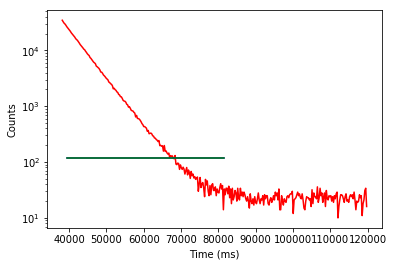

In [14]:
plt.semilogy(x[ix],y[ix],'r-') # label='Fit', marker='b-')
plt.semilogy(t,drslt,'b-')
plt.semilogy(t,srslt,'g-')
plt.xlabel('Time (ms)')
plt.ylabel('Counts')
# plt.title('410nm LED, 691.92 nm, 1mm diameter spherical ruby lifetime')
#plt.axis([0.0,10,400,10000]) # 1.05*y[0]])
#plt.plot(t,dexp(t,coeffs[0],coeffs[1],coeffs[2],coeffs[3],coeffs[4]),'ro')
plt.show()

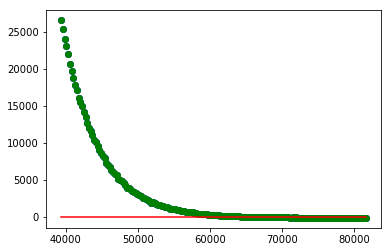

In [15]:
#plots the residuals 
plt.plot(t,ydata-drslt,'bo')
plt.plot(t,(ydata-srslt),'go')
plt.plot(t,(drslt-srslt),'r-')
plt.show()

# ---------4mm Ruby Analysis ---------------

In [16]:
# _s indicates for spherical ruby
xraw_s,yraw_s = np.loadtxt('4mm_410nmLED_1mmAP_lifetime.txt', usecols=(0,1),unpack=True)

In [17]:
npts_s = len(xraw_s)           # need to add -1 to SR430 data
ix_s = np.linspace(0,npts_s,npts_s)
x_s = xraw_s[0:npts_s]*1.0   # convert to millisec and get rid of extra point.
y_s = yraw_s[0:npts_s]
tN_s = [x_s,y_s]             # data (t,N) in ms and counts

In [18]:
#np.savetxt('test.txt',np.transpose(tN),fmt='%9.4f \t %9.0f')

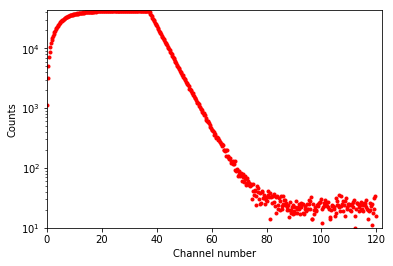

In [19]:
plt.semilogy(xraw_s,yraw_s,'r.')
plt.xlabel('Channel number')
plt.ylabel('Counts')
#plt.title('410nm LED, 691.92 nm, 1mm diameter spherical ruby lifetime')
plt.axis([0,122,10,43000])
plt.show()

In [20]:
No_s = y_s[0]
n1o_s = y_s[0]*2/3
n2o_s = n1o_s/2
gam1_s = 0.4                # inverse millisec
gam2_s = 0.1                # inverse millisec
B_s = 0.0
sps_s = [No_s,gam1_s,B_s]
dps_s = [n1o_s,gam1_s,n2o_s,gam2_s,B_s]

In [21]:
sexp_s = lambda t_s, No_s, gam1_s, B_s: \
    No_s*np.exp(-gam1_s*t_s) + B_s

dexp_s = lambda t_s, n1o_s, gam1_s, n2o_s, gam2_s, B_s: \
    n1o_s*np.exp(-gam1_s*t_s) + n2o_s*np.exp(-gam2_s*t_s) + B_s

In [22]:
startbin_s = 160
endbin_s = np.size(x_s)-0
dt_s = (x_s[1]-x_s[0])
nfit_s = npts_s-startbin_s-1
print(nfit_s,startbin_s*dt_s,nfit_s*dt_s)

339 38.4 81.36


In [23]:
t_s = x_s[startbin_s:endbin_s]-x_s[startbin_s-1]  # shifts where t = 0 to the decay part
to_s = 0.0
tf_s =t_s[nfit_s]
ydata_s = y_s[startbin_s:endbin_s]
Nerr_s = np.sqrt(ydata_s)

In [24]:
scoefs_s, scv_s = optimize.curve_fit(sexp_s, t_s, ydata_s, sps_s, \
                 sigma=Nerr_s, absolute_sigma=True)

dcoefs_s, dcv_s = optimize.curve_fit(dexp_s, t_s, ydata_s, dps_s, \
                 sigma=Nerr_s, absolute_sigma=True)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


In [25]:
sftr_s = scoefs_s
dftr_s = dcoefs_s
ii_s = np.linspace(0,2,3,dtype='int')   # for calculating stat errors of SEXP
jj_s = np.linspace(0,4,5,dtype='int')   # for calculating stat errors of DEXP
ssig_s = np.sqrt(scv_s[ii_s,ii_s])
dsig_s = np.sqrt(dcv_s[jj_s,jj_s])

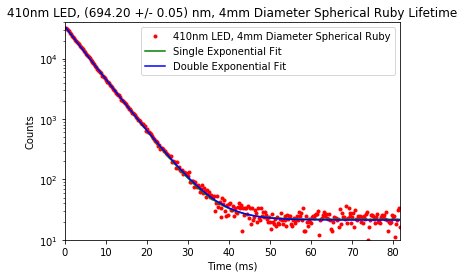

In [26]:
plot1, = plt.semilogy(t_s,ydata_s,'r.')
plot2, = plt.semilogy(t_s,sexp_s(t_s,sftr_s[0],sftr_s[1],sftr_s[2]),'g-',\
             label='S-Exp')                 # , marker='g-')
plot3, = plt.semilogy(t_s,dexp_s(t_s,dftr_s[0],dftr_s[1],dftr_s[2],dftr_s[3],\
             dftr_s[4]),'b-',label='D-Exp')   #   marker='b-')
plt.xlabel('Time (ms)')
plt.ylabel('Counts')
plt.title('410nm LED, (694.20 +/- 0.05) nm, 4mm Diameter Spherical Ruby Lifetime')
plt.legend((plot1, plot2, plot3), ('410nm LED, 4mm Diameter Spherical Ruby', 'Single Exponential Fit', 'Double Exponential Fit'))
plt.axis([to_s,tf_s,10,40000]) # 1.05*y[0]])
plt.show()

In [27]:
Sresids_s = ydata_s - sexp_s(t_s,sftr_s[0],sftr_s[1],sftr_s[2])
Dresids_s = ydata_s - dexp_s(t_s,dftr_s[0],dftr_s[1],dftr_s[2],dftr_s[3],dftr_s[4])

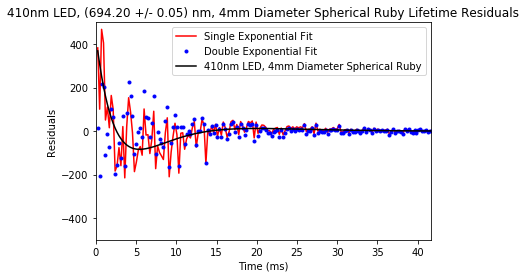

In [28]:
plota, = plt.plot(t_s,Sresids_s,'r-')
plotb, = plt.plot(t_s,Dresids_s,'b.')
plotc, = plt.plot(t_s,(Sresids_s-Dresids_s),'k-')
plt.xlabel('Time (ms)')
plt.ylabel('Residuals')
plt.title('410nm LED, (694.20 +/- 0.05) nm, 4mm Diameter Spherical Ruby Lifetime Residuals')
plt.legend((plota, plotb, plotc), ('Single Exponential Fit', 'Double Exponential Fit','410nm LED, 4mm Diameter Spherical Ruby'))
#plt.legend((plota, plotb), ('Single Exponential Fit', 'Double Exponential Fit'))
plt.axis([to_s,tf_s-40,-500,500]) # 1.05*y[0]])
plt.show()

In [29]:
print(sftr_s,'\n',ssig_s,'\n')
print(dftr_s,'\n',dsig_s,'\n')

[  3.38165198e+04   2.00521553e-01   2.17910069e+01] 
 [  5.96562098e+01   2.57018840e-04   3.45316053e-01] 

[  3.97264504e+03   2.98806947e-01   3.02825840e+04   1.94794089e-01
   2.11972005e+01] 
 [  2.53259420e+03   5.93609917e-02   2.58712889e+03   2.81001958e-03
   3.73735811e-01] 



In [30]:
gammas_s=sftr_s[1]
gammad1_s=dftr_s[1]
gammad2_s=dftr_s[3]
lifetimes_s= 1/(gammas_s)
lifetimed1_s=1/(gammad1_s)
lifetimed2_s=1/gammad2_s

In [31]:
print(lifetimes_s,lifetimed1_s,lifetimed2_s)

4.98699509541 3.34664240509 5.13362599986


# ------------LED Characteristics, No Ruby------------------------

In [32]:
x_nr,y_nr = np.genfromtxt('noruby_410nmLED.txt', unpack=True, usecols=(0,1))
x_nr = x_nr 
y_nr = (y_nr*50)+500

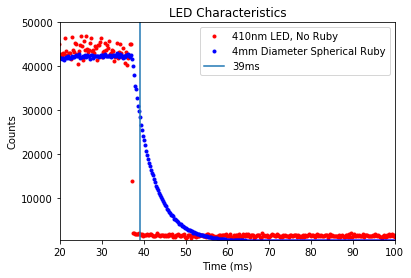

In [33]:
line1, = plt.plot(x_nr,y_nr,'r.')
line2, = plt.plot(xraw_s,yraw_s,'b.')
line3 = plt.axvline(x=39)
plt.xlabel('Time (ms)')
plt.ylabel('Counts')
plt.axis([20,100,400,50000])
plt.title('LED Characteristics')
plt.legend((line1, line2, line3), ('410nm LED, No Ruby', '4mm Diameter Spherical Ruby', '39ms'))
plt.show()

# -------------NIST Ruby-------------------------------

In [34]:
xrawNIST,yrawNIST = np.loadtxt('NIST_410nmLED_6946-5A.txt', usecols=(0,1),unpack=True)

In [35]:
nptsN = len(xrawNIST)           # need to add -1 to SR430 data
ixN = np.linspace(0,nptsN,nptsN)
xN = xrawNIST[0:nptsN]*1.0   # convert to millisec and get rid of extra point.
yN = yrawNIST[0:nptsN]
tNN = [xN,yN]             # data (t,N) in ms and counts

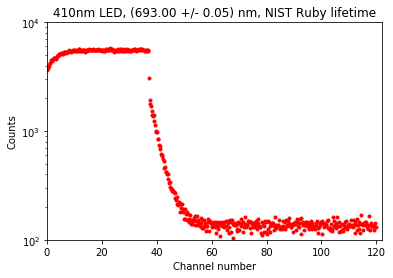

In [36]:
plt.semilogy(xN,yN,'r.')
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('410nm LED, (693.00 +/- 0.05) nm, NIST Ruby lifetime')
plt.axis([0,122,100,10000])
plt.show()

In [37]:
NoN = yN[0]
n1oN = yN[0]*2/3
n2oN = n1oN/2
gam1N = 0.4                # inverse millisec
gam2N = 0.1                # inverse millisec
BN = 0.0
spsN = [NoN,gam1N,BN]
dpsN = [n1oN,gam1N,n2oN,gam2N,BN]

In [38]:
sexpN = lambda tN, NoN, gam1N, BN: \
    NoN*np.exp(-gam1N*tN) + BN

dexpN = lambda tN, n1oN, gam1N, n2oN, gam2N, BN: \
    n1oN*np.exp(-gam1N*tN) + n2oN*np.exp(-gam2N*tN) + BN

In [39]:
startbinN = 160
endbinN = np.size(xN)-0
dtN = (xN[1]-xN[0])
nfitN = nptsN-startbinN-1
print(nfitN,startbinN*dtN,nfitN*dtN)

339 38.4 81.36


In [40]:
tN = xN[startbinN:endbinN]-xN[startbinN-1]  # shifts where t = 0 to the decay part
toN = 0.0
tfN =tN[nfitN]
ydataN = yN[startbinN:endbinN]
NerrN = np.sqrt(ydataN)

In [41]:
scoefsN, scvN = optimize.curve_fit(sexpN, tN, ydataN, spsN, \
                 sigma=NerrN, absolute_sigma=True)

dcoefsN, dcvN = optimize.curve_fit(dexpN, tN, ydataN, dpsN, \
                 sigma=NerrN, absolute_sigma=True)

In [42]:
sftrN = scoefsN
dftrN = dcoefsN
iiN = np.linspace(0,2,3,dtype='int')   # for calculating stat errors of SEXP
jjN = np.linspace(0,4,5,dtype='int')   # for calculating stat errors of DEXP
ssigN = np.sqrt(scvN[iiN,iiN])
dsigN = np.sqrt(dcvN[jjN,jjN])

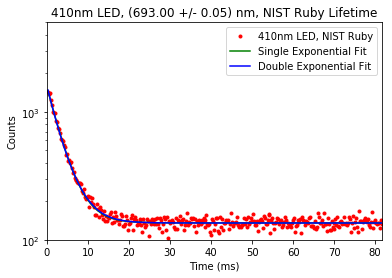

In [43]:
plot1, = plt.semilogy(tN,ydataN,'r.')
plot2, = plt.semilogy(tN,sexpN(tN,sftrN[0],sftrN[1],sftrN[2]),'g-',\
             label='S-Exp')                 # , marker='g-')
plot3, = plt.semilogy(tN,dexpN(tN,dftrN[0],dftrN[1],dftrN[2],dftrN[3],\
             dftrN[4]),'b-',label='D-Exp')   #   marker='b-')
plt.xlabel('Time (ms)')
plt.ylabel('Counts')
plt.title('410nm LED, (693.00 +/- 0.05) nm, NIST Ruby Lifetime')
plt.legend((plot1, plot2, plot3), ('410nm LED, NIST Ruby', 'Single Exponential Fit', 'Double Exponential Fit'))
plt.axis([toN,tfN,100,5000]) # 1.05*y[0]])
plt.show()

In [44]:
SresidsN = ydataN - sexpN(tN,sftrN[0],sftrN[1],sftrN[2])
DresidsN = ydataN - dexpN(tN,dftrN[0],dftrN[1],dftrN[2],dftrN[3],dftrN[4])

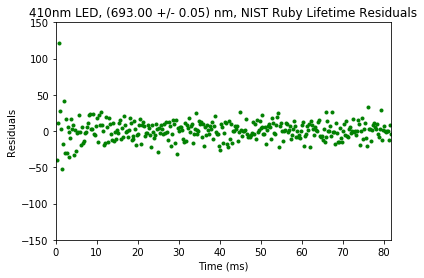

In [45]:
plota, = plt.plot(tN,SresidsN,'g.')
#plotb, = plt.plot(t,Dresids,'b.')
#plotc, = plt.plot(t,(Sresids-Dresids),'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Residuals')
plt.title('410nm LED, (693.00 +/- 0.05) nm, NIST Ruby Lifetime Residuals')
#plt.legend((plota, plotc), ('410nm LED, 'Double E))
plt.axis([toN,tfN,-150,150]) # 1.05*y[0]])
plt.show()

In [46]:
print(sftrN,'\n',ssigN,'\n')
print(dftrN,'\n',dsigN,'\n')

[  1.42128281e+03   3.03239286e-01   1.35544365e+02] 
 [  1.81389148e+01   3.75777931e-03   7.00559712e-01] 

[  1.96480520e+02   5.71700245e-01   1.25850849e+03   2.88164204e-01
   1.35304362e+02] 
 [  4.14402545e+02   6.30723483e-01   4.32917684e+02   2.83259738e-02
   7.39504031e-01] 



In [149]:
gammasN=sftrN[1]
gammaunc = ssigN[1]

lifetimesN= 1/(gammasN)
lifetimesNunc= gammaunc/(gammasN**2)

In [151]:
print(lifetimesN, lifetimesNunc)
print(gammasN,gammaunc)

3.29772574576 0.0408658315742
0.303239285828 0.00375777931117


In [49]:
wavelegnth = np.array([6925.5,6927.5,6930.0,6938.0,6942.0,6946.5])
NIST_lifetime = np.array([3.29317552093,3.27766713143,3.3398735551,3.26359472978,3.28465097263,3.29772574576])
lifetimeERR = np.array([0.0274819664614,0.0242184061565,0.0314070799245,0.0263056480875,0.0173554856112,0.0408658315742])

In [50]:
avelifetime = np.average(NIST_lifetime)
stdlifetime = np.std(NIST_lifetime)
print(avelifetime,(2*stdlifetime))

3.29278127594 0.0475301984029


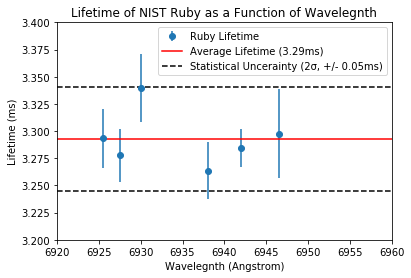

In [51]:
ploto = plt.errorbar(wavelegnth, NIST_lifetime, yerr=lifetimeERR, fmt='o')
ploti = plt.axhline(y=avelifetime,linestyle='-',color='r')
plotu = plt.axhline(y=((2*stdlifetime)+avelifetime),linestyle='--',color='k')
plotl = plt.axhline(y=(avelifetime-(2*stdlifetime)),linestyle='--',color='k')
plt.xlabel('Wavelegnth (Angstrom)')
plt.ylabel('Lifetime (ms)')
plt.title('Lifetime of NIST Ruby as a Function of Wavelegnth')
plt.axis([6920,6960,3.2,3.4])
plt.legend((ploto, ploti, plotu), ('Ruby Lifetime', 'Average Lifetime (3.29ms)','Statistical Uncerainty (2σ, +/- 0.05ms)'))
plt.show()

# -------------------R-lines----------------------------

In [130]:
x_lines,y_lines = np.loadtxt('r-lines_spec.txt', usecols=(0,1),unpack=True)
wavelegnth = np.array([6925.0,6927.0,6929.0,6938.0,6942.0,6945.5])
intensity = np.array([40000,52000,39000,40000,58000,40000])

In [131]:
lambda0 = 6910
m = 0.3334
Lambda = lambda0 + m*(x_lines)

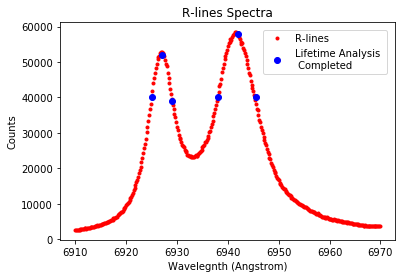

In [148]:
PLOT1, = plt.plot(Lambda,y_lines,'r.')
plt.xlabel('Wavelegnth (Angstrom)')
PLOT2, = plt.plot(wavelegnth,intensity,'bo')
plt.ylabel('Counts')
plt.title('R-lines Spectra')
#plt.axis([3.2,3.4,6920,6960])
leg = plt.legend((PLOT1, PLOT2), ('R-lines', 'Lifetime Analysis \n Completed'),loc = 'upper right')
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = 0.01
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

# ------ignore things below here... just where I'm brainstorming ------------

In [56]:
smax = np.amax(np.absolute(Sresids_s))
Nmax = np.amax(np.absolute(SresidsN))

In [57]:
DATAs = np.divide(Sresids_s,smax)
DATAN = np.divide(SresidsN,Nmax)

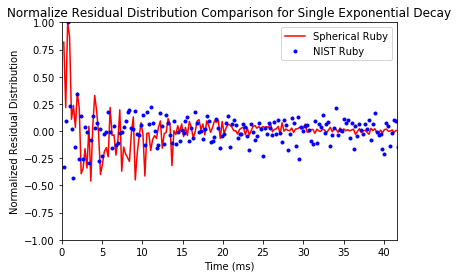

In [147]:
PLOTA, = plt.plot(t_s,DATAs,'r-')
PLOTB, = plt.plot(tN,DATAN,'b.')
plt.axis([to_s,tf_s-40,-1,1])
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Residual Distribution')
plt.title('Normalize Residual Distribution Comparison for Single Exponential Decay')
plt.legend((PLOTA, PLOTB), ('Spherical Ruby', 'NIST Ruby'))
plt.show()

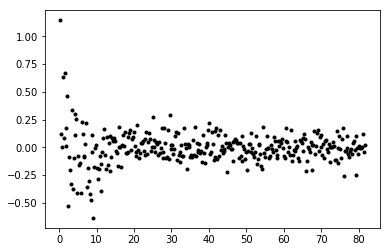

In [59]:
plt.plot(tN,(DATAs-DATAN),'k.')
plt.show()

In [60]:
len(DATAN)

340

In [61]:
Nmax

121.9456714060575

In [62]:
Nmax**2

14870.746774674149